Justin Kiggins

Oct 24, 2016

[justink@alleninstitute.org](mailto:justink@alleninstitute.org)

Summary of learning on cohorts 1-3 on the Detection of Change task.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

import sys
sys.path.append(r'C:\Users\justink\Code\dro')

import dro.utilities as dro
import dro.plotting_functions as dro_plots

failed to import CV2 in core.utilities


c:\users\justink\code\imaging_behavior\imaging_behavior\core\tifffile.py:278: UserWarning: ImportError: No module named '_tifffile'. Loading of some compressed images will be very slow. Tifffile.c can be obtained at http://www.lfd.uci.edu/~gohlke/
  "ImportError: No module named '_tifffile'. "


failed to import mask in core.jcamdata.py
failed to import get_mask_dict_gui in core.epoch.py
FreeType import Failed: Freetype library not found
failed to import mask relalated functions in __init__.py


In [2]:
from braintv_pilot.cohorts import cohort_assignment
cohort_assignment

,cohort,mouse_id
0,Cohort 4,M272464
1,Cohort 4,M271733
2,Cohort 4,M271728
3,Cohort 4,M276951
4,Cohort 4,M276950
5,Cohort 4,M276600
6,Cohort 3,M272465
7,Cohort 3,M265158
8,Cohort 3,M271966
9,Cohort 3,M265154


In [3]:
from braintv_pilot.cohorts import mouse_info
mouse_df = cohort_assignment['mouse_id'].apply(lambda mouse: pd.Series(mouse_info(mouse)))
cohort_assignment = cohort_assignment.merge(
    mouse_df,
    how='left',
    on='mouse_id',
)

In [42]:
cohort_assignment

,cohort,mouse_id,baselineweight,birthdate,dayonescript,driver1,driver2,group,iacuc_protocol,minweight,mousenotes,owner,reporter,sex,tasktype,training_location,userid,waterrestrictionstartdate
0,Cohort 4,M272464,20.2,2016-08-24,,None,None,EMX-Cre-Ai35,1406,85,Additional information...,sissyc,None,Male,None,None,sissyc,2016-10-21
1,Cohort 4,M271733,20.4,2016-08-01,,None,None,Nr5a1,1506,85,Additional information...,sissyc,None,Female,None,None,sissyc,2016-10-21
2,Cohort 4,M271728,23.0,2016-08-01,,None,None,Nr5a1,1506,85,Additional information...,sissyc,None,Male,None,None,sissyc,2016-10-21
3,Cohort 4,M276951,20.8,2016-08-27,,None,None,Emx-IRES-Cre;Ai95(NC),1506,85,Additional information...,sissyc,None,Female,None,None,sissyc,2016-10-21
4,Cohort 4,M276950,20.4,2016-08-27,,None,None,EMX-Cre-Ai35,1506,85,Additional information...,sissyc,None,Female,None,None,sissyc,2016-10-21
5,Cohort 4,M276600,16.6,2016-08-26,,None,None,EMX-Cre-Ai35,1506,85,Additional information...,sissyc,None,Female,None,None,sissyc,2016-10-21
6,Cohort 3,M272465,15.7,2016-08-27,,None,None,EMX-Cre-Ai35,1506,80,Additional information...,sissyc,None,Female,None,None,sissyc,2016-10-05
7,Cohort 3,M265158,20.7,2016-06-28,,None,None,Rorb-IRES2-Cre; Camk2a-tTA; Ai93 (NC),1506,80,Additional information...,sissyc,None,Female,None,None,sissyc,2016-09-30
8,Cohort 3,M271966,22.0,2016-08-27,,None,None,EMX-Cre-Ai35,1506,80,Additional information...,sissyc,None,Female,None,None,sissyc,2016-10-05
9,Cohort 3,M265154,27.7,2016-06-28,,None,None,Rorb-IRES2-Cre; Camk2a-tTA; Ai93 (NC),1506,80,Additional information...,sissyc,None,Male,None,None,sissyc,2016-09-30


## Load data

In [4]:
import logging
logger = logging.getLogger(__name__)

In [5]:
from braintv_pilot.latest import copy_latest, local_dir
copy_latest()
df = dro.load_from_folder(local_dir)

Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160822113114-task=DetectionOfChange_Gratings_stage=1_AutoRewards_mouse=M246782.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160822113354-task=DetectionOfChange_Gratings_stage=1_AutoRewards_mouse=M249123.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160822113755-task=DetectionOfChange_Gratings_stage=1_AutoRewards_mouse=M258174.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160822113955-task=DetectionOfChange_Gratings_stage=1_AutoRewards_mouse=M250783.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160822114152-task=DetectionOfChange_Gratings_stage=1_AutoRewards_mouse=M250786.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160823142816-task=DetectionOfChange_Gratings_stage=2_LickDetectTraini

C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 3 but corresponding boolean dimension is 7
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160824144444-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M249123.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 22 but corresponding boolean dimension is 27
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160824144837-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250786.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160824145234-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258174.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 5 but corresponding boolean dimension is 37
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160825140824-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M249123.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160825140911-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258174.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160825141054-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250786.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160825141506-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250783.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160825141626-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M246782.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160826150845-task=DetectionOfChang

C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 8 but corresponding boolean dimension is 25
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160826151535-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250786.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 24 but corresponding boolean dimension is 28
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160826152006-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M246782.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 3 but corresponding boolean dimension is 16
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160826152207-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250783.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160829144952-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258174.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160829144959-task=DetectionOfChange_Gratings_stage=1_AutoRewards_mouse=M258196.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160829151344-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250786.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160829151614-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250783.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 3 but corresponding boolean dimension is 9
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160829152031-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M249123.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160829152209-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M246782.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160830124248-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250786.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160830124409-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250783.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160830124521-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258196.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 2 but corresponding boolean dimension is 17
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160830124655-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M246782.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160830124832-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M249123.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160830125028-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258174.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160831141642-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258174.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160831144039-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250783.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160831144209-task=DetectionOfChang

C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 0 but corresponding boolean dimension is 3
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160831144816-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250786.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 7 but corresponding boolean dimension is 26
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160902123311-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250783.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 0 but corresponding boolean dimension is 10
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160902124538-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M249123.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 3 but corresponding boolean dimension is 10
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160902125132-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250786.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160902125457-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258174.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160902125953-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258196.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 12 but corresponding boolean dimension is 107
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160902130156-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M246782.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 0 but corresponding boolean dimension is 1
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160906144353-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250786.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160906144949-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250783.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160906145328-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258174.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160906145514-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M249123.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160906145710-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M246782.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160906145959-task=DetectionOfChang

C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 32 but corresponding boolean dimension is 33
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))
C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 50 but corresponding boolean dimension is 51
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))
C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 37 but corresponding boolean dimension is 38
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160908100410-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250786.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 46 but corresponding boolean dimension is 47
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))
C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 48 but corresponding boolean dimension is 49
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))
C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 36 but corresponding boolean dimension is 37
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))
C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 44 but corresponding boolean dimension is 45
  lt.app

Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160908101009-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M249123.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160908101444-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250783.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 33 but corresponding boolean dimension is 34
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))
C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 61 but corresponding boolean dimension is 62
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))
C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 69 but corresponding boolean dimension is 70
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))
C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 60 but corresponding boolean dimension is 61
  lt.app

Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160908102948-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258196.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 22 but corresponding boolean dimension is 23
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))
C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 57 but corresponding boolean dimension is 58
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))
C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 79 but corresponding boolean dimension is 80
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))
C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 55 but corresponding boolean dimension is 56
  lt.app

Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160908103123-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M246782.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 75 but corresponding boolean dimension is 76
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160909101741-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250786.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 24 but corresponding boolean dimension is 25
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160909102528-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250783.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 18 but corresponding boolean dimension is 19
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160909103512-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258174.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160909104415-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M249123.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160909104738-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258196.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 49 but corresponding boolean dimension is 50
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))
C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 38 but corresponding boolean dimension is 39
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160909105023-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M246782.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 80 but corresponding boolean dimension is 81
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))
C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 11 but corresponding boolean dimension is 12
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))
C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 12 but corresponding boolean dimension is 13
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))
C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 85 but corresponding boolean dimension is 86
  lt.app

Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160912105820-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250786.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160912111323-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258174.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160912112514-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M249123.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 3 but corresponding boolean dimension is 4
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160912112804-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250783.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160912113003-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258196.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160912113129-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M246782.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160913104952-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258174.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160913105701-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250786.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160913110035-task=DetectionOfChang

C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 28 but corresponding boolean dimension is 35
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160914112644-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258174.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160915095612-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250783.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160915095921-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M249123.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160915100030-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258196.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160915100036-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258174.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160915100624-task=DetectionOfChang

C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1 but corresponding boolean dimension is 10
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160915103012-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M246782.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160916093036-task=DetectionOfChange_Gratings_stage=1_AutoRewards_mouse=M258174.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 43 but corresponding boolean dimension is 72
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160916102357-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250783.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160916102556-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M249123.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160916103242-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M246782.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160916103357-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258174.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160916103654-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250786.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160916104007-task=DetectionOfChang

C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 5 but corresponding boolean dimension is 8
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160919113230-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M249123.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160919114437-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258196.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160919115344-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M246782.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 11 but corresponding boolean dimension is 19
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160919120145-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258174.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160919120149-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250786.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160919132702-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258275.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160919133344-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M261584.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160919133434-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258173.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 0 but corresponding boolean dimension is 6
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160919133658-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258089.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160919133900-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258276.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160919134048-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258274.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160920142855-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258174.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160920142901-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258196.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160920144038-task=DetectionOfChang

C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1 but corresponding boolean dimension is 6
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160920153525-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258089.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160920153923-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258274.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160920154236-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258275.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160920155134-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258276.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160920155518-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M261584.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160920155738-task=DetectionOfChang

C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 8 but corresponding boolean dimension is 15
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160922132742-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258173.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160922133048-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258274.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160922141455-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250786.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160922142352-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250783.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 17 but corresponding boolean dimension is 61
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160922142723-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258196.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160922142953-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258174.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 37 but corresponding boolean dimension is 69
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160923100403-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250783.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160923100456-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258174.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160923101600-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250786.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160923101832-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258196.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160923103051-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M261584.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160923103418-task=DetectionOfChang

C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 8 but corresponding boolean dimension is 19
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160926121433-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258174.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160926121848-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250783.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160926121959-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M261584.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 7 but corresponding boolean dimension is 13
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160926122257-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258089.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160926122410-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250786.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 68 but corresponding boolean dimension is 85
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160926122618-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258196.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160926131735-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258173.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 13 but corresponding boolean dimension is 26
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160926132129-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258275.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 4 but corresponding boolean dimension is 11
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160926132717-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258276.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160926132930-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258274.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160927120755-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258196.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160927122135-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250783.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160927122704-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258174.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160927122849-task=DetectionOfChang

C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 70 but corresponding boolean dimension is 94
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160927142220-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258275.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160927142311-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M261584.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160927142503-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258089.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 3 but corresponding boolean dimension is 5
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160927142751-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258173.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 10 but corresponding boolean dimension is 46
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160927142954-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258276.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160927143050-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258274.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 0 but corresponding boolean dimension is 8
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160928103941-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258173.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160928104213-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258196.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160928104407-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250783.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 26 but corresponding boolean dimension is 32
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160928104527-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258174.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160928104639-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250786.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160928105103-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M261584.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160928111902-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258275.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 2 but corresponding boolean dimension is 8
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160928111905-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258089.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 3 but corresponding boolean dimension is 18
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160928111909-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258276.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160928111914-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258274.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 27 but corresponding boolean dimension is 58
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160929102235-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258174.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160929105829-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250783.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160929110137-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250786.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160929110250-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258196.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160929113218-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258276.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160929113745-task=DetectionOfChang

C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 2 but corresponding boolean dimension is 12
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160929115237-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258089.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 4 but corresponding boolean dimension is 6
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160929115504-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258173.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160930102929-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258196.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160930103038-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250783.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160930103241-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258174.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160930103443-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250786.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 4 but corresponding boolean dimension is 30
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160930111603-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M261584.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160930111617-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258276.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160930111805-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258173.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160930112500-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258274.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160930113822-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258275.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\160930114103-task=DetectionOfChang

C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 4 but corresponding boolean dimension is 8
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161003110222-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250783.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 7 but corresponding boolean dimension is 34
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161003110410-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258174.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161003110618-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250786.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161003110740-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258196.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161003110853-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M261584.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161003111128-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258173.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161003115226-task=DetectionOfChang

C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 2 but corresponding boolean dimension is 4
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161003121130-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258274.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161004144841-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258275.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161004145235-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258274.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161004145523-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M261584.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161004145859-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258089.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 4 but corresponding boolean dimension is 7
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161004150316-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258173.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 7 but corresponding boolean dimension is 17
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161004150716-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258276.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161005101517-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250783.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161005101626-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258174.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161005101737-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250786.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161005101932-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258196.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161005105041-task=DetectionOfChang

C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1 but corresponding boolean dimension is 2
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161006101507-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250783.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161006101919-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258174.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161006102057-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250786.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161006102329-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M261584.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 7 but corresponding boolean dimension is 12
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161006102532-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258089.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161006110959-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258274.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161006111157-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258275.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161006112207-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258173.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161006112423-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258276.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161007091901-task=DetectionOfChang

C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 10 but corresponding boolean dimension is 11
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161010101926-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258089.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161010102130-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258173.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 5 but corresponding boolean dimension is 7
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161010102249-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258276.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161010110828-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258089.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161010110828-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M272465.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161010112913-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M265158.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161010113040-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M271966.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161010113304-task=DetectionOfChang

C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 14 but corresponding boolean dimension is 19
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161010113744-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M265166.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161010140204-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258174.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161010140327-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250783.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 9 but corresponding boolean dimension is 40
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161010140514-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258196.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 0 but corresponding boolean dimension is 17
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161010140640-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250786.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161011094635-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258274.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161011095530-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258275.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161011101140-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M261584.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161011101256-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258089.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161011101436-task=DetectionOfChang

C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 0 but corresponding boolean dimension is 13
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161011111803-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M265154.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161011112035-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258194.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 12 but corresponding boolean dimension is 23
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161011112445-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M265166.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161011132704-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258196.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161011134011-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258174.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161011134149-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250783.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 46 but corresponding boolean dimension is 52
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161011134342-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250786.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 5 but corresponding boolean dimension is 16
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161012095517-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258274.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161012101444-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258275.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161012101742-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M261584.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161012101853-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258089.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 2 but corresponding boolean dimension is 3
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161012102000-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258173.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 6 but corresponding boolean dimension is 15
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161012102158-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258276.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161012105846-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M265158.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 28 but corresponding boolean dimension is 58
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161012111702-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M272465.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161012111955-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M271966.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161012112355-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M265154.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161012112639-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M265166.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161012112926-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258194.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 14 but corresponding boolean dimension is 29
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161012125631-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258174.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161012130101-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258196.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161012130544-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250786.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161012132135-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250783.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161013100340-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258089.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161013100343-task=DetectionOfChang

C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 8 but corresponding boolean dimension is 18
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161014101917-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258173.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 7 but corresponding boolean dimension is 9
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161014104522-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M272465.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161014111048-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M265154.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161014111317-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M265158.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161014111321-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M265166.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161014111936-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M271966.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161014112139-task=DetectionOfChang

C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 6 but corresponding boolean dimension is 11
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161017115220-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M265158.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161017121234-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M271966.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 2 but corresponding boolean dimension is 35
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161017121458-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258194.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161017121812-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M265166.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161017125703-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258196.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 2 but corresponding boolean dimension is 9
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161017132407-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258174.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161017132904-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250783.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 32 but corresponding boolean dimension is 38
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161017132921-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250786.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161018100244-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258274.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161018101156-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258275.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161018103631-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258089.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161018103947-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258276.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161018104405-task=DetectionOfChang

C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 0 but corresponding boolean dimension is 35
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161020093317-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258275.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161020094451-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258274.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161020095438-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258089.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161020101508-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M261584.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161020101703-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258173.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161020102041-task=DetectionOfChang

C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 3 but corresponding boolean dimension is 6
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161021101005-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M265154.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161021101158-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M265158.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161021101442-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258194.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161021104543-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M265166.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161021110356-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258196.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161021113600-task=DetectionOfChang

C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 46 but corresponding boolean dimension is 78
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161024144554-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250783.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 0 but corresponding boolean dimension is 2
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161024144710-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250786.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161025091412-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258089.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161025091651-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258274.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161025091656-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258275.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161025092246-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M261584.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161025093919-task=DetectionOfChang

C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 3 but corresponding boolean dimension is 23
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161026104836-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M271966.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161026105214-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M265166.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161026131006-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258196.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161026134807-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258174.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161026134923-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250783.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161027093539-task=DetectionOfChang

C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 5 but corresponding boolean dimension is 9
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161027100138-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M265154.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161027100509-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M265166.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161027144233-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258274.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161027144959-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M261584.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161027145606-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258275.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161027145904-task=DetectionOfChang

C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 54 but corresponding boolean dimension is 76
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161027150549-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258196.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161027150607-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258276.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161027150613-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250783.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 0 but corresponding boolean dimension is 29
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161027150648-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250786.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161027151653-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258173.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161028095701-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258194.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161028101102-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M271966.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161028101534-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M265154.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161028102813-task=DetectionOfChang

C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 43 but corresponding boolean dimension is 45
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161028103457-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M265166.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161028103542-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M265158.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161028104427-task=DetectionOfChange_Gratings_stage=1_AutoRewards_mouse=M276950.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161028105716-task=DetectionOfChange_Gratings_stage=1_AutoRewards_mouse=M271723.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161028110951-task=DetectionOfChange_Gratings_stage=1_AutoRewards_mouse=M276600.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 53 but corresponding boolean dimension is 67
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161028111448-task=DetectionOfChange_Gratings_stage=1_AutoRewards_mouse=M271728.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161028114508-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258196.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161028115004-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258174.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161028120448-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250786.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161028120935-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M250783.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161028140514-task=DetectionOfChange_Grati

C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 3 but corresponding boolean dimension is 13
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161031085923-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M272465.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 39 but corresponding boolean dimension is 52
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161031090040-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M271966.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161031090216-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M265154.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161031090523-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M265166.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161031090758-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M265158.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161031105928-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M276950.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161031110102-task=DetectionOfChang

C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 25 but corresponding boolean dimension is 48
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161031110906-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M271728.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161031115645-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M271728.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161031120102-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M276950.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161031120146-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M271733.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161031120423-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M276600.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161031120746-task=DetectionOfChang

C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 12 but corresponding boolean dimension is 19
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161031145726-task=DoC_Gratings_multi_ori_multi_contrast_stage=2_LickDetectTraining_mouse=M258174.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161031145820-task=DoC_Gratings_multi_ori_multi_contrast_stage=2_LickDetectTraining_mouse=M258196.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161031145857-task=DoC_Gratings_multi_ori_multi_contrast_stage=2_LickDetectTraining_mouse=M250786.pkl


C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 6 but corresponding boolean dimension is 9
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161031145940-task=DoC_Gratings_multi_ori_multi_contrast_stage=2_LickDetectTraining_mouse=M250783.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161031152117-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M261584.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161031152324-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258173.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161031152441-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258276.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161031153553-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258089.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161031153946-task=Detec

C:\Users\justink\Code\dro\dro\utilities.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 10 but corresponding boolean dimension is 29
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals>1]))


Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161101140228-task=DoC_Gratings_multi_ori_multi_contrast_stage=2_LickDetectTraining_mouse=M258174.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161101140354-task=DoC_Gratings_multi_ori_multi_contrast_stage=2_LickDetectTraining_mouse=M250786.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161101140405-task=DoC_Gratings_multi_ori_multi_contrast_stage=2_LickDetectTraining_mouse=M258196.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161101140543-task=DoC_Gratings_multi_ori_multi_contrast_stage=2_LickDetectTraining_mouse=M250783.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161101144441-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258275.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..

In [6]:
df = df.merge(
    cohort_assignment,
    how='left',
    on='mouse_id',
)

In [80]:
df['startdatetime'].dt.date.unique()

array([datetime.date(2016, 10, 28), datetime.date(2016, 10, 31),
       datetime.date(2016, 11, 1), datetime.date(2016, 8, 22),
       datetime.date(2016, 8, 23), datetime.date(2016, 8, 24),
       datetime.date(2016, 8, 25), datetime.date(2016, 8, 26),
       datetime.date(2016, 8, 29), datetime.date(2016, 8, 30),
       datetime.date(2016, 8, 31), datetime.date(2016, 9, 2),
       datetime.date(2016, 9, 6), datetime.date(2016, 9, 7),
       datetime.date(2016, 9, 8), datetime.date(2016, 9, 9),
       datetime.date(2016, 9, 12), datetime.date(2016, 9, 13),
       datetime.date(2016, 9, 14), datetime.date(2016, 9, 15),
       datetime.date(2016, 9, 16), datetime.date(2016, 9, 19),
       datetime.date(2016, 9, 20), datetime.date(2016, 9, 21),
       datetime.date(2016, 9, 22), datetime.date(2016, 9, 23),
       datetime.date(2016, 9, 26), datetime.date(2016, 9, 27),
       datetime.date(2016, 9, 28), datetime.date(2016, 9, 29),
       datetime.date(2016, 9, 30), datetime.date(2016, 10,

In [88]:
# ## identify training day

def get_training_day(df_in):

    training_day_lookup = {}
    for key, group in df_in.groupby(['mouse_id',]):
        dates = np.sort(group['date'].unique())
        training_day_lookup[key] = {date:training_day for training_day,date in enumerate(dates)}
    return df_in.apply(lambda row: training_day_lookup[row['mouse_id']][row['date']],axis=1)

df['date'] = df['startdatetime'].dt.date.astype(str)
df['training_day'] = get_training_day(df)

# df['day_of_week'] = df.startdatetime.dt.weekday_name

## build arrays for change detection

df['change'] = df['trial_type'].isin(['go','miss'])
df['detect'] = df['response']==1.0

## calculate reaction times

df['reaction_time'] = df['lick_times'].map(lambda x: x[0] if len(x)>0 else np.nan)
df['reaction_time'] = df.apply(lambda row: row['reaction_time'] - row['change_time'],axis=1)

## unwrap the response window
df['response_window_lower'] = df['response_window'].map(lambda x: x[0])
df['response_window_upper'] = df['response_window'].map(lambda x: x[1])


In [43]:
from behaviorist import metrics

In [63]:
def compute_metrics(group):
    result = {
        'd-prime': metrics.discrim(group,'change','detect',metric=metrics.d_prime),
        'discrim_p': metrics.discrim(group,'change','detect',metric=metrics.discrim_p),
        'response_bias': metrics.response_bias(group,'detect'),
        'earned_water': metrics.earned_water(group), 
        'total_water': metrics.total_water(group), 
        'num_trials': metrics.num_trials(group),
        'num_contingent_trials': metrics.num_contingent_trials(group),
        'reaction_time_50th%ile': metrics.reaction_times(group,percentile=50),
        'reaction_time_05th%ile': metrics.reaction_times(group,percentile=5),
        'reaction_time_95th%ile': metrics.reaction_times(group,percentile=95),
    }
    
    return pd.Series(result, name='metrics')

water = df.groupby(['cohort','mouse_id','training_day']).apply(compute_metrics).reset_index()
water['frac_earned_water'] = water['earned_water'] / water['total_water']
water['reaction_time_spread'] = water['reaction_time_95th%ile'] - water['reaction_time_05th%ile']
water.head()

metrics,cohort,mouse_id,training_day,d-prime,discrim_p,earned_water,num_contingent_trials,num_trials,reaction_time_05th%ile,reaction_time_50th%ile,reaction_time_95th%ile,response_bias,total_water,frac_earned_water,reaction_time_spread
0,Cohort 1,M246782,0,NaN,1.000000,1.092,156.0,157.0,-5.020008,0.334217,3.778943,0.544872,1.092,1.0,8.798951
1,Cohort 1,M246782,1,-0.057545,0.946458,0.354,356.0,1563.0,0.161557,1.286406,4.141207,0.171348,0.354,1.0,3.979650
2,Cohort 1,M246782,2,-0.803594,0.076643,0.198,117.0,394.0,0.208261,1.360493,5.292036,0.273504,0.198,1.0,5.083775
3,Cohort 1,M246782,3,-0.025337,0.783441,0.276,186.0,426.0,0.087997,1.401724,4.474582,0.193548,0.276,1.0,4.386585
4,Cohort 1,M246782,4,-0.262469,0.681377,0.530,179.0,423.0,0.150696,1.343656,4.549200,0.296089,0.530,1.0,4.398504


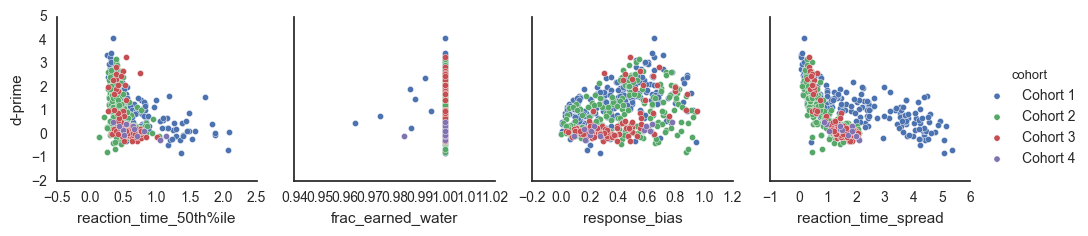

In [64]:
sns.pairplot(data=water,
             hue='cohort',
             y_vars=['d-prime',],
             x_vars=['reaction_time_50th%ile','frac_earned_water','response_bias','reaction_time_spread'],
            )

In [65]:
def stars(p,ns='n.s.',thresh=(0.1,0.05,0.01,0.001)):
    '''Converts p-values into R-styled stars.
    Signif. codes:
        '***' :  < 0.001
        '**' : < 0.01
        '*' : < 0.05
        '.' : < 0.1
        'n.s.' : < 1.0
    '''
    lookup = (
        (0.001, '***'),
        (0.01, '**'),
        (0.05, '*'),
        (0.1, '.'),
    )
    for t,s in lookup:
        if (t in thresh) and (p < t):
            return s
    return ns

def plot_stars(p,x,y,ax,ns='n.s.',thresh=(0.1,0.05,0.01,0.001),size='large',horizontalalignment='center',**kwargs):
    ''' Plots significance stars '''
    ax.text(x,y,stars(p,ns,thresh),size=size,horizontalalignment=horizontalalignment,**kwargs)

def plot_linestar(p,x1,x2,y,ax):
    ax.hlines(y, x1, x2)
    plot_stars(0.5*(x1+x2),y+0.02,stars(p),ax=ax,size='large',horizontalalignment='center')

In [66]:
class RisingEdge():
    """
    This object implements a "rising edge" detector on a boolean array.
    
    It takes advantage of how pandas applies functions in order.
    
    For example, if the "criteria" column in the `df` dataframe consists of booleans indicating
    whether the row meets a criterion, we can detect the first run of three rows above criterion
    with the following
    
        first_run_of_three = (
            df['criteria']
            .rolling(center=False,window=3)
            .apply(func=RisingEdge().check)
            )
    
    ```
    
    """
    def __init__(self):
        self.firstall = False
    def check(self,arr):
        if arr.all():
            self.firstall = True
        return self.firstall

In [67]:
pdf = water
pdf['d_prime'] = pdf['d-prime']
pdf['stimulus_control'] = pdf['discrim_p'] < 0.01

In [68]:

num_tr_thresh = 20
dprime_thresh = 0.5

consecutive_sessions = 2

pdf['criteria'] = (
    pdf['stimulus_control']
    & (pdf['num_contingent_trials'] > num_tr_thresh)
    & (pdf['d_prime'] > dprime_thresh)
)

mask = pdf.num_trials > num_tr_thresh # ignore sessions with very few trials

first = {}

for key, group in pdf[mask].set_index('training_day').sort_index().groupby(['cohort','mouse_id']):
#     print group.head()
    learned = (
        group['criteria']
        .rolling(center=False,window=consecutive_sessions)
        .apply(func=RisingEdge().check)
        )
    summary = pd.DataFrame(
        [learned.rename('learned'),
         group['stimulus_control'],
         group['d_prime'],
         group['num_trials'],
        ]).transpose()
    
    try:
        first_session = summary['learned'][summary['learned']==1.0].index[0] #+(1-consecutive_sessions)
    except IndexError:
        first_session = np.nan
    
    print key, first_session
#     print summary.tail()
    
    first[key[1]]=first_session
    
def learned(row):
    first_day = first[row['mouse_id']]
    
    if pd.isnull(first_day):
        return False
    else: 
        return (first_day <= row['training_day'])
    
pdf['learned'] = pdf.apply(learned,axis=1)

('Cohort 1', 'M246782') 19
('Cohort 1', 'M249123') nan
('Cohort 1', 'M250783') 9
('Cohort 1', 'M250786') 9
('Cohort 1', 'M258174') 4
('Cohort 1', 'M258196') 8
('Cohort 2', 'M258089') 11
('Cohort 2', 'M258173') 22
('Cohort 2', 'M258274') 5
('Cohort 2', 'M258275') 8
('Cohort 2', 'M258276') nan
('Cohort 2', 'M261584') 10
('Cohort 3', 'M258194') 6
('Cohort 3', 'M265154') nan
('Cohort 3', 'M265158') nan
('Cohort 3', 'M265166') nan
('Cohort 3', 'M271966') 11
('Cohort 3', 'M272465') 12
('Cohort 4', 'M271728') nan
('Cohort 4', 'M271733') nan
('Cohort 4', 'M272464') nan
('Cohort 4', 'M276600') nan
('Cohort 4', 'M276950') nan
('Cohort 4', 'M276951') nan


In [90]:
for _,row in cohort_assignment[cohort_assignment['cohort']=='Cohort 4'].iterrows():
    print training_day_lookup[row['mouse_id']]

{'2016-10-28': 0, '2016-11-01': 2, '2016-10-31': 1}
{'2016-11-01': 1, '2016-10-31': 0}
{'2016-10-28': 0, '2016-11-01': 2, '2016-10-31': 1}
{'2016-10-28': 0, '2016-11-01': 2, '2016-10-31': 1}
{'2016-10-28': 0, '2016-11-01': 2, '2016-10-31': 1}
{'2016-10-28': 0, '2016-11-01': 2, '2016-10-31': 1}


In [89]:
df[df.cohort=='Cohort 4'].groupby(['mouse_id'])['training_day'].unique()

mouse_id
M271728    [0, 1, 2]
M271733       [0, 1]
M272464    [0, 1, 2]
M276600    [0, 1, 2]
M276950    [0, 1, 2]
M276951    [0, 1, 2]
Name: training_day, dtype: object

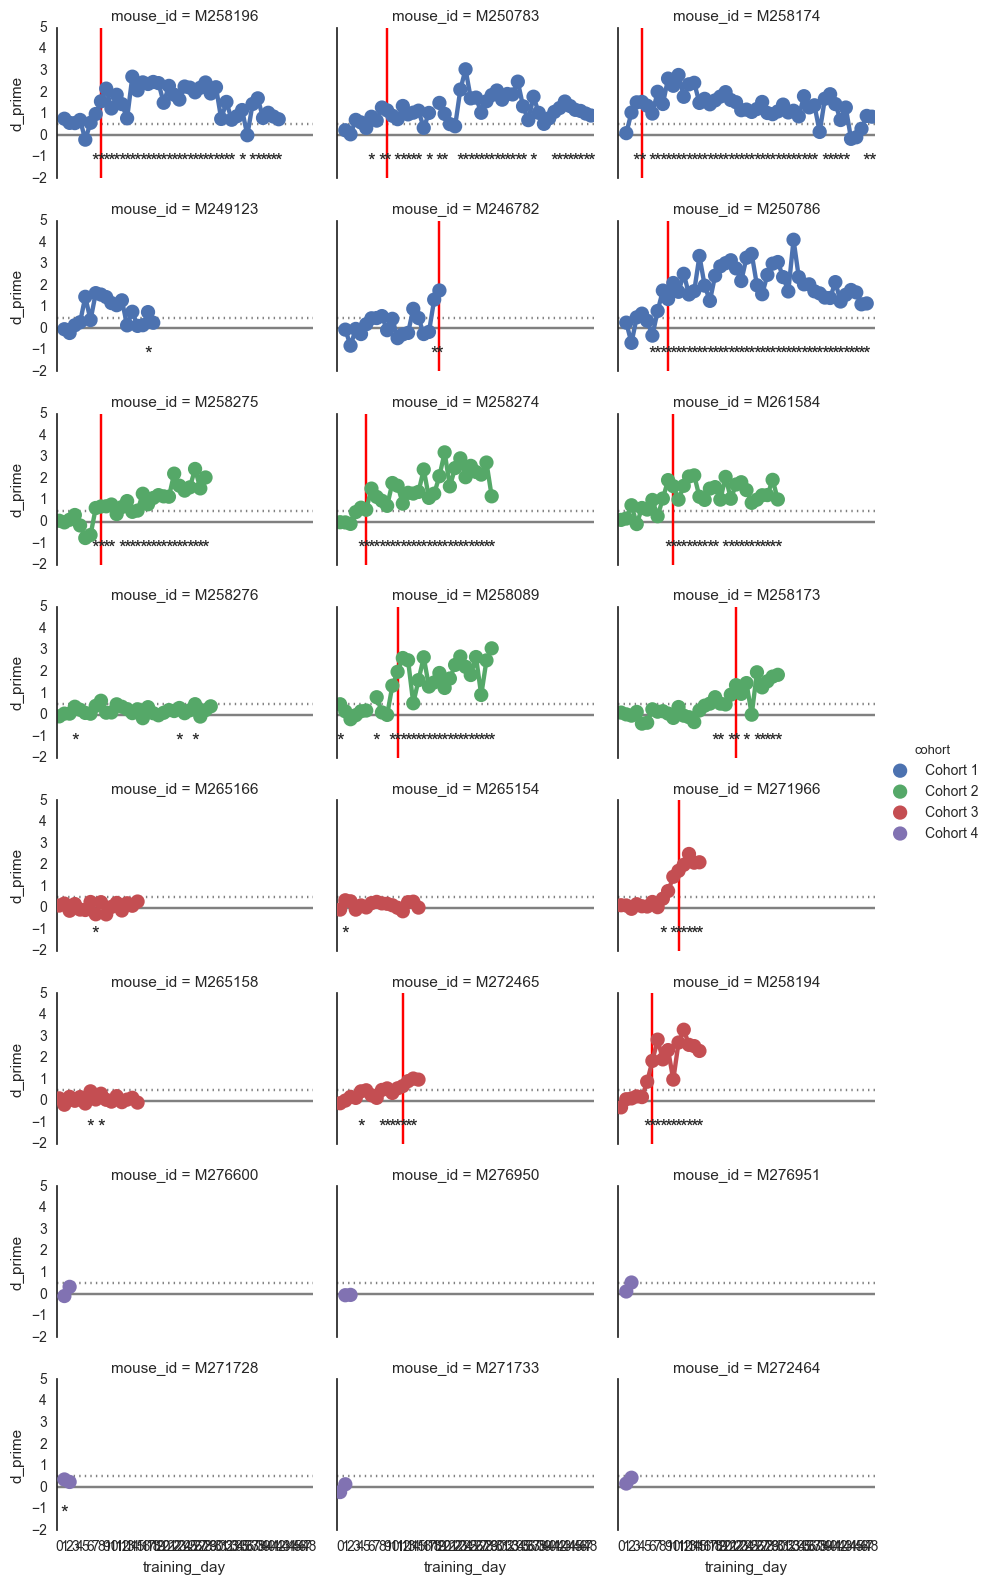

In [71]:
col_order = cohort_assignment.sort_values('cohort')['mouse_id']


fp = sns.factorplot('training_day','d_prime',data=pdf,
                    col='mouse_id',
                    col_wrap=3,
                    size=2,
                    aspect=1.5,
                    hue='cohort',
                    col_order=col_order,
              )

yloc = -1.5

for ax,mouse_id in zip(fp.axes.ravel(),col_order):
    ax.axhline(0.0,color='0.5',zorder=-1)
    ax.axhline(dprime_thresh,linestyle=':',color='0.5',zorder=-1)
#     print mouse_id
    for r,row in pdf[mask & (pdf['mouse_id']==mouse_id)].iterrows():
        p, x = row['discrim_p'], row['training_day']
        plot_stars(p,x,yloc,ax,ns='',thresh=(0.05,))
    ax.axvline(first[mouse_id],color='r',zorder=-1)
    
sns.despine(bottom=True)
# plt.xlim(0,8)

In [72]:
(
    pdf
    .groupby(['cohort','mouse_id'])['training_day']
    .max()
    .reset_index()
    .groupby('cohort')['training_day']
    .min()
)

cohort
Cohort 1    18
Cohort 2    28
Cohort 3    15
Cohort 4     1
Name: training_day, dtype: int64

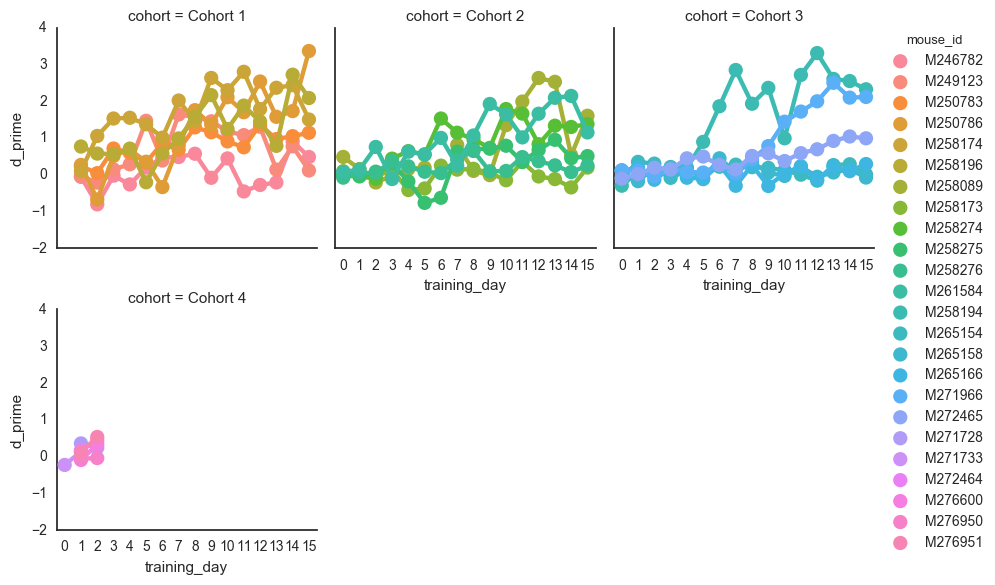

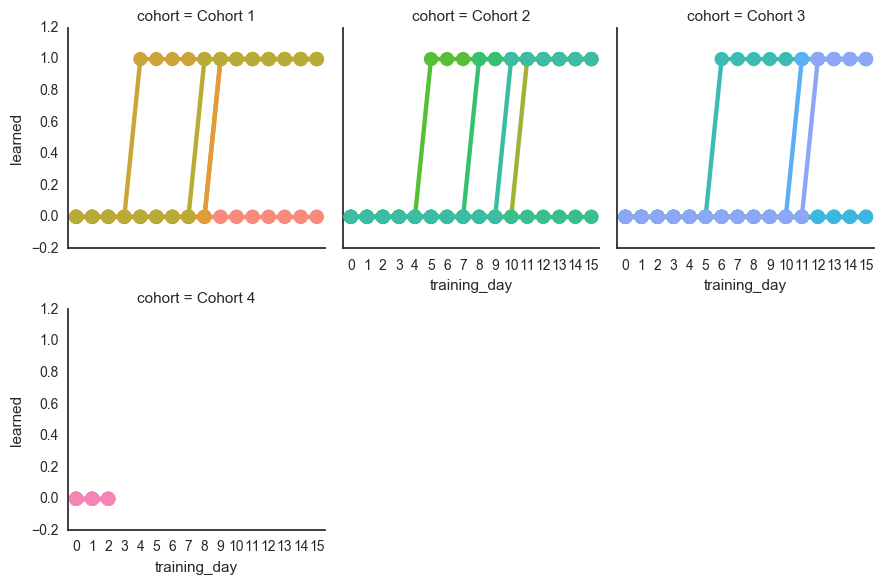

In [76]:
mask = (
#     (pdf.num_trials > num_tr_thresh) # ignore sessions with very few trials
#     & (pdf.training_day <= pdf.groupby('mouse_id')['training_day'].max().min())
    (pdf.training_day <= 15)
    )

fp = sns.factorplot('training_day','d_prime',data=pdf[mask],
                    hue='mouse_id',
                    col_wrap=3,
                    size=3,
#                     aspect=2,
                    col='cohort',
#                     col_order=col_order,
              )

fp = sns.factorplot('training_day','learned',data=pdf[mask],
                    hue='mouse_id',
                    col_wrap=3,
                    size=3,
#                     aspect=2,
                    col='cohort',
#                     col_order=col_order,
                    legend=False,
              )

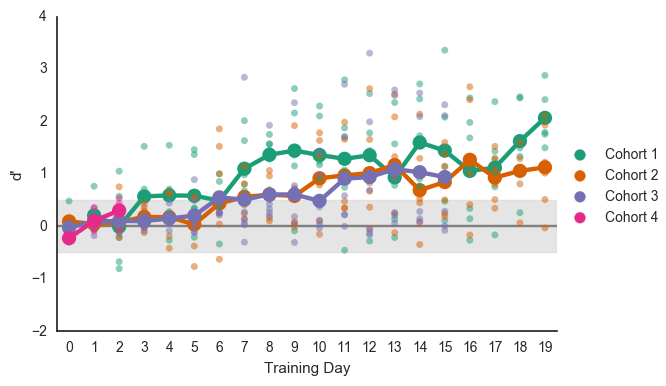

In [77]:
# mask = (
#     (pdf.num_trials > num_tr_thresh) # ignore sessions with very few trials
#     & (pdf.training_day <= 19)
#     )

mask = (
    (pdf.training_day <= 19)
)

g = sns.factorplot('training_day','d_prime',data=pdf[mask],
                    aspect=1.2,
                    hue='cohort',
                    kind='strip',  
                    legend=True,
                    alpha=0.5,
                    palette='Dark2'
              )

g.map_dataframe(sns.pointplot,'training_day','d_prime',
                hue='cohort',
                palette='Dark2',
                zorder=1000,
                ci=None,
                )
g.set_axis_labels('Training Day', 'd\'')
g.fig.get_children()[-1].set_bbox_to_anchor((1.15, 0.5, 0, 0))
g.fig.get_children()[-1].set_title('')


for ax in g.axes.ravel():
    ax.axhline(0.0,color='0.5',zorder=-10)
    ax.axhspan(-0.5,0.5,color='0.5',alpha=0.2,zorder=-10)
    